In [21]:
# Zachary Katz
# zachary_katz@mines.edu
# 01 July 2024

"""
Flow line Calculation for Totten Glacier
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import xarray as xr

import shapefile

from shapely.plotting import plot_polygon, plot_line
from shapely.geometry import LineString

In [2]:
# Read netcdf
velocity = xr.open_dataset(
    "/mnt/c/users/ZacharyKatz/Desktop/Research/Background/Measures_v2/antarctica_ice_velocity_450m_v2.nc"
)

In [3]:
# Read gl
gl = "/mnt/c/users/ZacharyKatz/Desktop/Research/Background/Antarctica_masksX/scripps_antarctica_polygons_v1.shp"
grounding_line = shapefile.Reader(gl)

In [77]:
# Make flowline
def flowline(x, y, vel, steps, stepsize):
    # Stepsize in years because vel in m/yr
    out_x = []
    out_y = []

    out_x.append(x)
    out_y.append(y)

    for i in range(steps):
        interpolated = vel.interp(x=x, y=y)
        vx = interpolated["VX"].data
        vy = interpolated["VY"].data
        x += vx * stepsize
        y += vy * stepsize
        out_x.append(x)
        out_y.append(y)

    return out_x, out_y

In [ ]:
# Location of LA17, LA08

start_x = [-295794.4436628938, -283164.5985829391]
start_y = [-502073.72147959383, -513010.53034769]

# Plot vel field and flowline
# Plot Velocity Field
bbox = [-400000, -800000, -60000, -420000]  # Includes all of Crary
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_box_aspect((bbox[3] - bbox[1]) / (bbox[2] - bbox[0]))

cropped_vel = velocity.sel(x=slice(bbox[0], bbox[2]), y=slice(bbox[3], bbox[1]))

flowline_x = []
flowline_y = []
for i in range(len(start_x)):
    x, y = flowline(start_x[i], start_y[i], cropped_vel, 1000, 1)
    flowline_x.append(x)
    flowline_y.append(y)

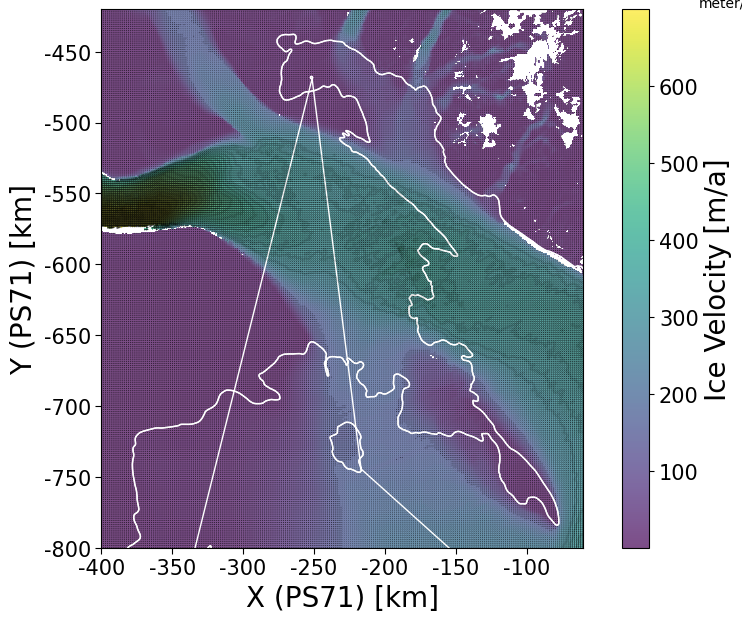

In [15]:
# Plot Velocity Field
bbox = [-400000, -800000, -60000, -420000]  # Includes all of Crary
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_box_aspect((bbox[3] - bbox[1]) / (bbox[2] - bbox[0]))

cropped_vel = velocity.sel(x=slice(bbox[0], bbox[2]), y=slice(bbox[3], bbox[1]))
vel_mag = np.sqrt(
    (cropped_vel["VX"] * cropped_vel["VX"] + cropped_vel["VY"] * cropped_vel["VY"])
)
cbar = xr.plot.imshow(vel_mag, ax=ax, alpha=0.7)
cropped_vel.thin(3).plot.quiver("x", "y", "VX", "VY", alpha=0.7, color="black")

# https://stackoverflow.com/questions/68630958/how-to-change-the-interval-of-contours-colorbar-in-matplotlib-to-visualize-tempe
max_level = 900
min_level = 300
step_level = 20
ax.contour(
    cropped_vel["x"],
    cropped_vel["y"],
    vel_mag,
    levels=np.arange(min_level, max_level + step_level, step_level),
    colors="black",
    alpha=0.1,
)

for shape in grounding_line.shapes():
    points = shape.points
    ap = plt.Polygon(points, fill=False, edgecolor="white")
    ax.add_patch(ap)

for f_x, f_y in zip(flowline_x, flowline_y):
    ax.plot(f_x, f_y, "black", linewidth=2)

KM_SCALE = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / KM_SCALE))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / KM_SCALE))
ax.yaxis.set_major_formatter(ticks_y)


ax.set_xlabel("X (PS71) [km]", size=20)
ax.set_ylabel("Y (PS71) [km]", size=20)
ax.tick_params(labelsize=15)
ax.tick_params(size=4)
im = ax.images
cbar = im[-1].colorbar
ax.set_xlim([bbox[0], bbox[2]])
ax.set_ylim([bbox[1], bbox[3]])

cbar.ax.tick_params(labelsize=15)
cbar.ax.set_ylabel("Ice Velocity [m/a]", size=20)

plt.locator_params(axis="y", nbins=8)

In [75]:
print(flowline_x)
print(flowline_y)


def inBox(points, bbox):
    # Return points from points that are in bbox
    inbox = []
    for point in points:
        x = point[0]
        y = point[1]
        if x > bbox[0] and x < bbox[2] and y > bbox[1] and y < bbox[3]:
            inbox.append(point)
    return inbox

[-295794.4436628938, -295593.04360020725, -295390.833092457, -295187.633883209, -294983.11835594825, -294777.181818609, -294569.95552399865, -294361.6087693435, -294152.18507758493, -293941.849033351, -293730.73305398686, -293519.24621771433, -293307.56614118954, -293095.50801425905, -292883.04773708124, -292669.64662625775, -292454.85214918386, -292238.3344381267, -292019.8483149779, -291799.4953854924, -291577.1639780471, -291352.85430424276, -291126.7544548741, -290898.8596549699, -290669.2046600806, -290437.9800890374, -290205.2581931008, -289970.99744747416, -289735.0924609085, -289497.5431772174, -289258.2737719867, -289017.78529058123, -288776.10911783687, -288533.7819898516, -288290.9117538582, -288047.64550358785, -287803.85824564303, -287559.3207967095, -287313.7290465752, -287066.93942325184, -286818.65476311796, -286568.53119174135, -286317.1852358115, -286064.639901777, -285810.99941814324, -285556.50433823955, -285301.18476463825, -285045.0363325697, -284787.8484602038, -

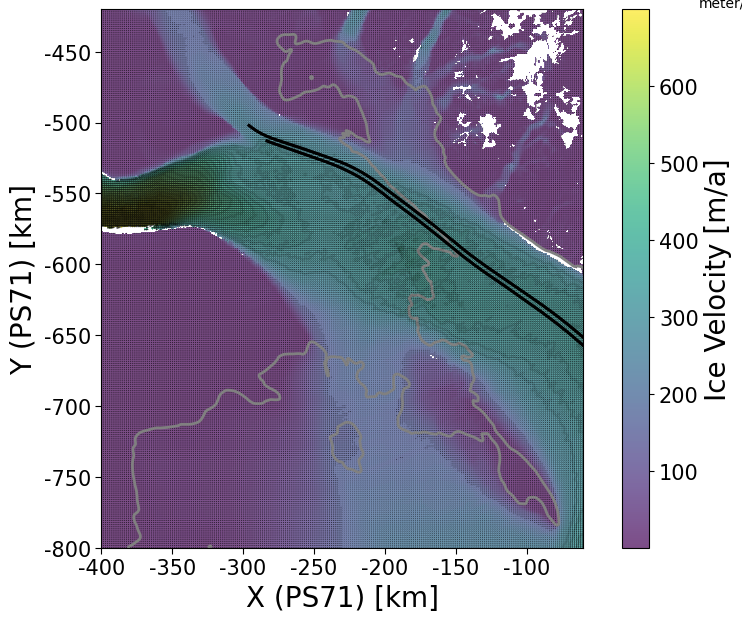

In [28]:
# Plot vel field and flowline
# Plot Velocity Field
bbox = [-400000, -800000, -60000, -420000]  # Includes all of Crary
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_box_aspect((bbox[3] - bbox[1]) / (bbox[2] - bbox[0]))

cropped_vel = velocity.sel(x=slice(bbox[0], bbox[2]), y=slice(bbox[3], bbox[1]))
vel_mag = np.sqrt(
    (cropped_vel["VX"] * cropped_vel["VX"] + cropped_vel["VY"] * cropped_vel["VY"])
)
cbar = xr.plot.imshow(vel_mag, ax=ax, alpha=0.7)
cropped_vel.thin(3).plot.quiver("x", "y", "VX", "VY", alpha=0.7, color="black")

# https://stackoverflow.com/questions/68630958/how-to-change-the-interval-of-contours-colorbar-in-matplotlib-to-visualize-tempe
max_level = 900
min_level = 300
step_level = 20
ax.contour(
    cropped_vel["x"],
    cropped_vel["y"],
    vel_mag,
    levels=np.arange(min_level, max_level + step_level, step_level),
    colors="black",
    alpha=0.1,
)
for fx, fy in zip(flowline_x, flowline_y):
    ax.plot(fx, fy, "black", linewidth=2)
for i, shape in enumerate(grounding_line.shapes(bbox=bbox)):
    if i > 0:
        points = shape.points
        # Only get points within bounding box
        inbox = inBox(points, bbox)
        line = LineString(inbox)
        plot_line(line, ax=ax, add_points=False, color="gray")

for f_x, f_y in zip(flowline_x, flowline_y):
    ax.plot(f_x, f_y, "black", linewidth=2)

KM_SCALE = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / KM_SCALE))
ax.xaxis.set_major_formatter(ticks_x)
ticks_y = ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x / KM_SCALE))
ax.yaxis.set_major_formatter(ticks_y)


ax.set_xlabel("X (PS71) [km]", size=20)
ax.set_ylabel("Y (PS71) [km]", size=20)
ax.tick_params(labelsize=15)
ax.tick_params(size=4)
im = ax.images
cbar = im[-1].colorbar
ax.set_xlim([bbox[0], bbox[2]])
ax.set_ylim([bbox[1], bbox[3]])

cbar.ax.tick_params(labelsize=15)
cbar.ax.set_ylabel("Ice Velocity [m/a]", size=20)

plt.locator_params(axis="y", nbins=8)

POINT (-166639.96359017363 -571609.7095472162)
148.0471456245977
POINT (-152627.45012824622 -588064.8214121547)
151.84349279781023


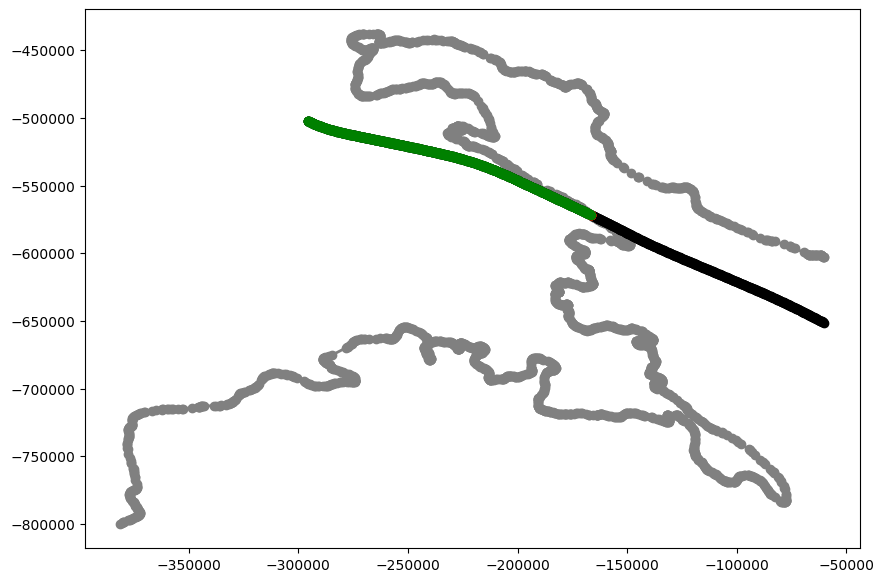

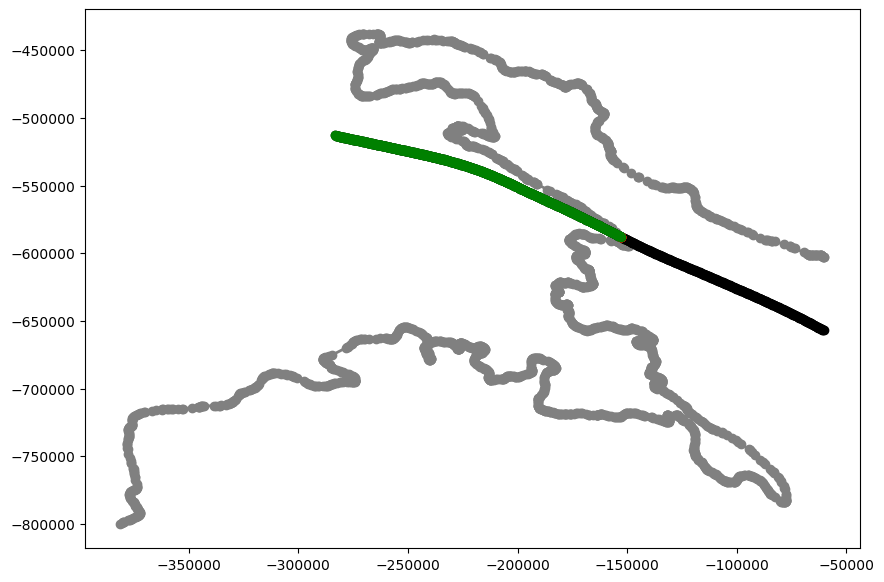

In [95]:
# Find intersection of gl and flowline
import shapely

for i in range(len(flowline_x)):
    flowline_ = LineString(zip(flowline_x[i], flowline_y[i]))
    M_TO_KM = 1e3
    # for f_x, f_y in zip(flowline_x,flowline_y):

    fig, ax = plt.subplots(figsize=(10, 7))
    plot_line(line, ax=ax, add_points=True, color="gray")
    plot_line(flowline_, ax=ax, add_points=True, color="black")

    flowline_buffered = flowline_.buffer(0.000001)
    line_buffered = line.buffer(0.000001)

    result = shapely.intersection(flowline_buffered, line_buffered)
    plot_polygon(result, ax=ax, alpha=0.5, color="red")
    print(result.centroid)
    # terminate flowline at x calues < centroid
    flowline_x_prime = [x for x in flowline_x[i] if x < result.centroid.x]
    flowline_y_prime = flowline_y[i][: len(flowline_x_prime)]
    flowline_terminated = LineString(zip(flowline_x_prime, flowline_y_prime))
    plot_line(flowline_terminated, ax=ax, add_points=True, color="green")
    len_km = shapely.length(flowline_terminated) / M_TO_KM

    print(len_km)